In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
data["Mouse ID"].value_counts().count()

249

In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = data[data["Mouse ID"] == "g989"]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data[data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts().count()

248

## Summary Statistics

In [85]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_reg = clean_data.groupby(["Drug Regimen"])
meantv = grouped_reg.mean()["Tumor Volume (mm3)"]
mediantv = grouped_reg.median()["Tumor Volume (mm3)"]
vartv = grouped_reg.var()["Tumor Volume (mm3)"]
stddevtv = grouped_reg.std()["Tumor Volume (mm3)"]
semtv = grouped_reg.sem()["Tumor Volume (mm3)"]

reg_df = pd.DataFrame({
    "Mean Tumor Volume": meantv,
    "Median Tumor Volume": mediantv,
    "Tumor Volume Variance": vartv,
    "Tumor Volume Std. Dev.": stddevtv,
    "Tumor Volume Std. Err.": semtv
})
reg_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

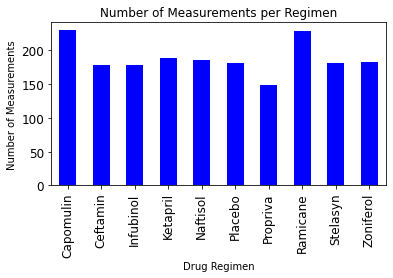

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_array = grouped_reg.count()["Mouse ID"]

countdf = pd.DataFrame({
    "Number of Measurements": count_array
})
plot_pd = countdf.plot.bar(figsize=(6,3), color='b',fontsize = 12, ylabel = "Number of Measurements", 
                           title = "Number of Measurements per Regimen", legend = False)

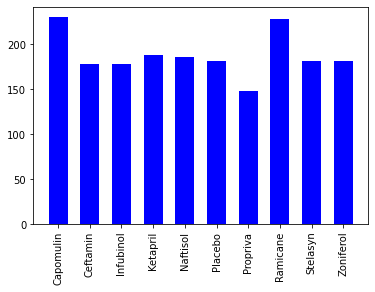

In [77]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
#used https://stackoverflow.com/questions/28844535/python-pandas-groupby-get-list-of-groups
#also used https://stackabuse.com/rotate-axis-labels-in-matplotlib/
regimens = grouped_reg.groups.keys()
plt.bar(regimens, count_array, color='b', width = 0.6, align="center")
plt.xticks(rotation = 90)
plt.show()

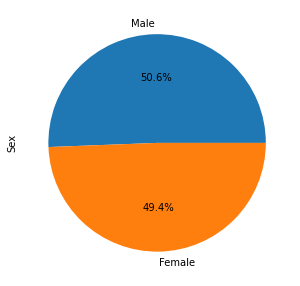

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
males = data["Mouse ID"][data["Sex"] == "Male"].count()
females = data["Mouse ID"][data["Sex"] == "Female"].count()
genderdf = pd.DataFrame({
    "Sex": [males, females]},
    index = ["Male", "Female"]
)
genderdf.plot.pie(y="Sex", figsize = (5,5), autopct='%1.1f%%', legend = False)
plt.show()

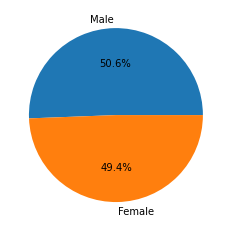

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=[males, females], labels = ["Male", "Female"], autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    
    # add subset 
   
    
    # Determine outliers using upper and lower bounds
 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


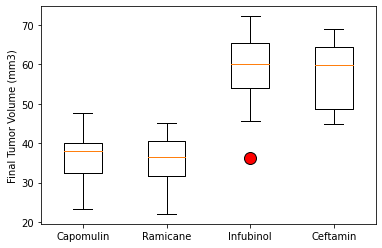

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

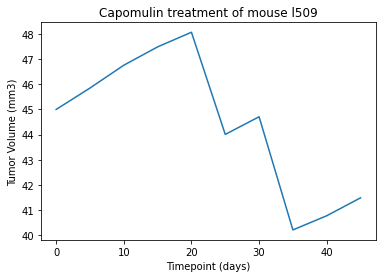

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


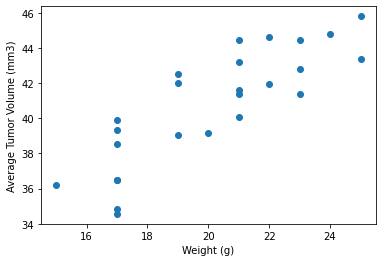

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


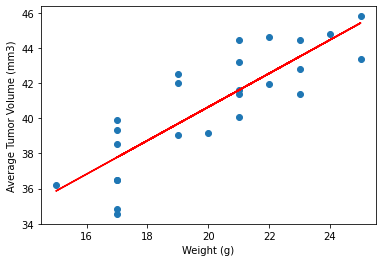

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
